# Smoothing

# 1. Initialisation

## Import libraries and scripts

In [2]:
%matplotlib ipympl
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import AutoMinorLocator

import numpy as np
from time import time
from scipy import ndimage

import importlib
import scripts
importlib.reload(scripts)

> DEBUG: all scripts have been reloaded
> DEBUG: all scripts have been reloaded


<module 'scripts' from '/home/yago/public/git/paranoya/image-processing/scripts/__init__.py'>

## Read data

In [3]:
importlib.reload(scripts.read_data)
object_name, data, wcs = scripts.read_data.run(21, (0, 0, 1))

Read dataset 21: "CIG 335" (1000, 1000) (0.0662 s)


# 2. Analysis

## Smoothing

In [4]:
n_smooth = 2
kernel_sizes = np.logspace(0, 2, n_smooth)
print(f'smoothing radius: {kernel_sizes}')

smoothing radius: [  1. 100.]


In [5]:
smooth_data = np.empty((n_smooth,)+data.shape)
for i, radius in enumerate(kernel_sizes):
    smooth_data[i] = ndimage.gaussian_filter(data, radius)

## Sorting

In [6]:
importlib.reload(scripts.sort_data)

smooth_rank = np.zeros_like(smooth_data)
argsorted_smooth = np.empty((n_smooth, data.size))*np.nan
for i, radius in enumerate(kernel_sizes):
    argsorted_data, n_valid = scripts.sort_data.run(smooth_data[i].ravel())
    argsorted_smooth[i, :n_valid] = argsorted_data
    smooth_rank[i].ravel()[argsorted_data] = 1 + np.arange(n_valid)
    smooth_rank[i] /= data.size

argsorted_data, n_valid = scripts.sort_data.run(data.ravel())
rank = np.zeros_like(data)
rank.ravel()[argsorted_data] = 1 + np.arange(n_valid)
rank /= data.size

    

Sorted 1000000 finite measurements in ascending order (0.119 s)
Sorted 1000000 finite measurements in ascending order (0.0726 s)
Sorted 1000000 finite measurements in ascending order (0.093 s)


## Mode

0.0005331075828764586 1.6850054886671026e-06 861790
0.0004874330728177777 1.522145328502141e-06 836120
0.0004859381396641335 1.5080641481274418e-06 835298
0.0004858820223088162 1.507605290722304e-06 835258
0.0004858803041445835 1.5075876967439753e-06 835258
0.00048588044991387054 1.5075872063638923e-06 835258
0.0003795048589324471 3.317365707770508e-07 773500
0.00033477843955455577 2.4708696977750784e-07 718020
0.0003318321019588998 2.352597671407467e-07 714254
0.0003316018292288218 2.3452323871509944e-07 713972
0.0003315836179393338 2.3446587361128287e-07 713936
0.00033158343431399377 2.3446204530374755e-07 713936
0.003937247433246778 4.764928988170386e-05 757986
0.001728144285392417 1.0430610549333506e-05 401350
0.0011496539956526355 1.038208265503709e-06 186400
0.0011887302170745173 2.0794518434194935e-07 201754
0.00120246284804916 2.1900822744375773e-07 207136
0.0012061794344106196 2.210098622753711e-07 208586


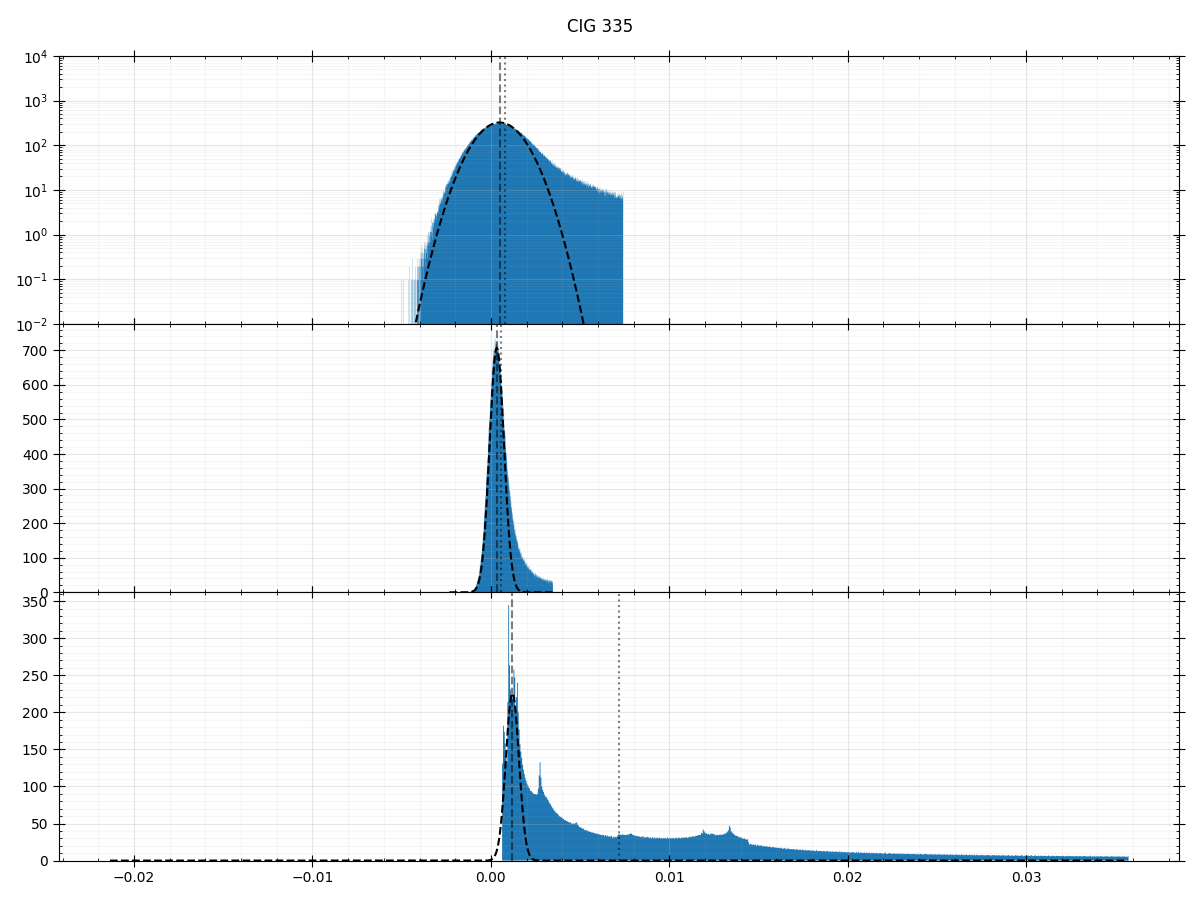

In [83]:
'''
def show_data(sorted_x, ax, sigma, alpha):
    x = sorted_x[1:-1]
    y = (sorted_x[1:-1]-sorted_x[:-2]) / (sorted_x[2:]-sorted_x[:-2])
    #ax.plot(x, y, 'c-', alpha=.1)
    ax.plot(x, np.nancumsum(y)/np.arange(y.size), 'b-', alpha=alpha, label=f'$\sigma$={sigma:.1f}')
    ax.plot(x[::-1], np.nancumsum(y[::-1])/np.arange(y.size), 'r-', alpha=alpha, label=f'$\sigma$={sigma:.1f}')
'''

def show_data(x, ax, sigma, alpha):
    p16, p50, p84 = np.nanpercentile(x, [16, 50, 84])
    sigma = min(p50-p16, p84-p50)
    n_sigmas = 5
    bins=p50+n_sigmas*np.arange(-sigma, sigma, sigma/(1+np.sqrt(.34*x.size)))
    hist = ax.hist(x, histtype='stepfilled', bins=bins, density=True)

    mu_w = p50
    sigma_w = sigma
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)

    mu_w = mu0
    sigma_w = np.median(mu0-x[x < mu0])
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)

    mu_w = mu0
    sigma_w = np.median(mu0-x[x < mu0])
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)
    mu_w = mu0
    sigma_w = np.median(mu0-x[x < mu0])
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)
    mu_w = mu0
    sigma_w = np.median(mu0-x[x < mu0])
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)
    mu_w = mu0
    sigma_w = np.median(mu0-x[x < mu0])
    weight = np.exp(-.5*((x-mu_w)/sigma_w)**2)
    total_weight = np.nansum(weight)
    mu = np.nansum(weight * x) / total_weight
    var =  np.nansum(weight * (x-mu)**2) / total_weight
    var0 = 1 / (1/var - 1/sigma_w**2)
    mu0 = var0 * (mu/var - mu_w/sigma_w**2)
    N0 = 2*np.count_nonzero(x < mu0)
    print(mu0, var0, N0)
    
    var0 += np.median(mu0-x[x < mu0])**2
    var0 /= 2

    ax.axvline(p50, c='k', ls=':', alpha=.5)
    x_bins = (bins[1:]+bins[:-1])/2
    #weight_bins = np.exp(-.5*((x_bins-mu_w)/sigma_w)**2)
    #ax.plot(x_bins, np.interp(mu_w, x_bins, hist[0])*weight_bins, 'k:')
    #ax.axvline(mu_w, c='k', ls=':', alpha=.5)
    gaussian_fit = np.exp(-.5*(x_bins-mu0)**2/var0)
    ax.plot(x_bins, gaussian_fit * N0/np.sqrt(2*np.pi*var0)/x.size, 'k--')
    ax.axvline(mu0, c='k', ls='--', alpha=.5)
    #print(mu_w, sigma**2)
    #print(mu, var)
    #print(mu0, var0, N0)

fig_name = 'find_mode'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(12, 3*(n_smooth+1)))
axes = fig.subplots(nrows=1+n_smooth, ncols=1, squeeze=False,
                    sharex='col', sharey='row',
                    gridspec_kw={'hspace': 0, 'wspace': 0}
                   )
fig.set_tight_layout(True)
fig.suptitle(object_name)
for ax in axes.flat:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)
    ax.tick_params(which='major', direction='inout', length=8, grid_alpha=.3)
    ax.tick_params(which='minor', direction='in', length=2, grid_alpha=.1)
    ax.grid(True, which='both')

    
ax = axes[0, 0]
ax.set_yscale('log')
ax.set_ylim(1e-2, 1e4)
#show_data(data.ravel()[argsorted_data], ax, 0, 1)
#ax.axvline(np.nanmedian(data), c='k', ls=':', alpha=.5)
show_data(data.ravel(), ax, 0, 1)
for i in range(n_smooth):
    show_data(smooth_data[i].ravel(), axes[i+1, 0], kernel_sizes[i], 1)

ax = axes[-1, 0]
#ax.set_xscale('symlog', linthresh=np.std(data-smooth_data[0]))

# 4. Visual inspection

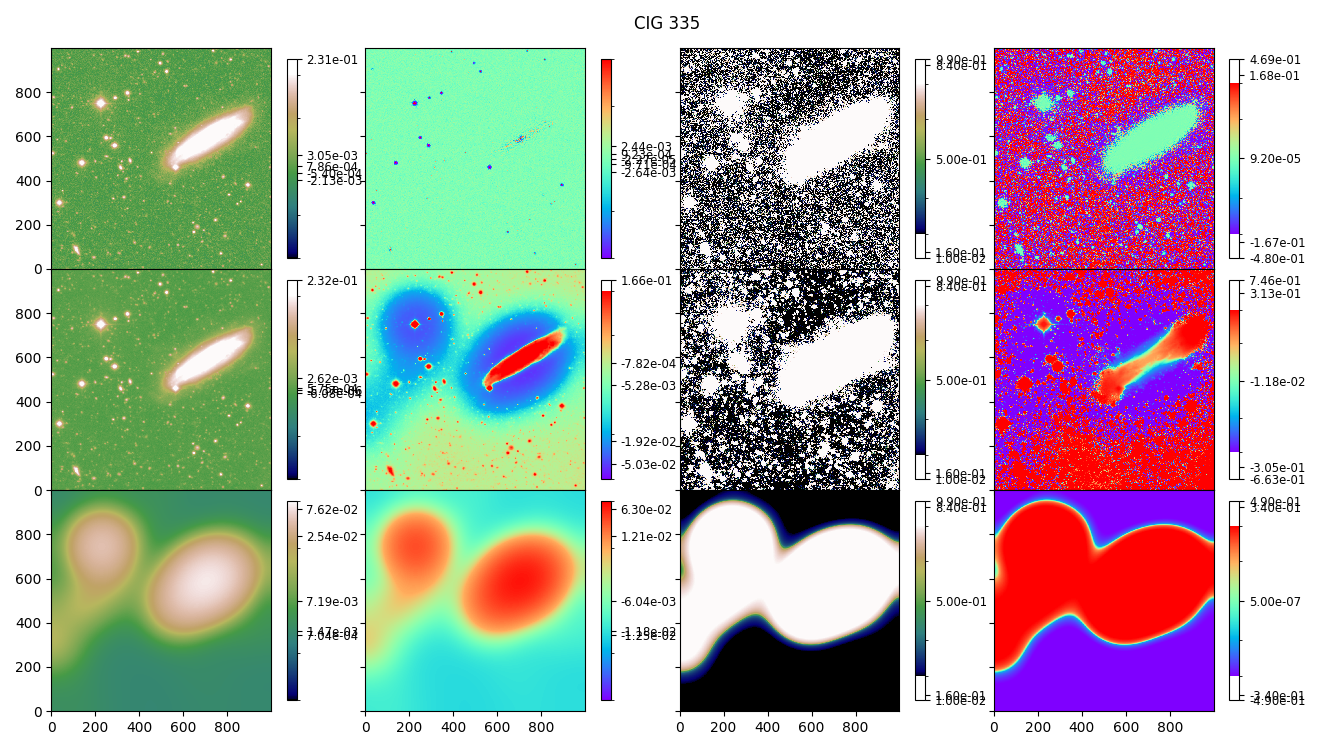

In [71]:
def show_data(data, ax, cmap='gist_earth'):
    percentiles = np.array([1, 16, 50, 84, 99])
    data_percentile = np.nanpercentile(data, [1, 16, 50, 84, 99])
    median = data_percentile[np.argmin(np.abs(percentiles-50))]
    #std = np.std(data[data < median])
    std = min(median-data_percentile[1], data_percentile[3]-median)
    ticks = data_percentile-median
    im = ax.imshow(data-median,
                   interpolation='nearest', origin='lower',
                   cmap=cmap,
#                   norm=colors.SymLogNorm(vmin=ticks[0], vmax=ticks[-1], linthresh=std),
                   norm=colors.SymLogNorm(vmin=-.1, vmax=.1, linthresh=.01),
                  )
    ax.set_aspect('auto')
    cb = fig.colorbar(im, ax=ax, orientation='vertical', shrink=.9, fraction=cbar_fraction)
    cb.ax.set_yticks(ticks=ticks, labels=[f'{value:.2e}' for value in data_percentile], fontsize='small')


fig_name = 'visual_inspection'
plt.close(fig_name)

nrows = n_smooth+1
ncols = 4
panel_size = 2.5
cbar_fraction = .25

fig = plt.figure(fig_name, figsize=(ncols*panel_size/(1-cbar_fraction), nrows*panel_size))
axes = fig.subplots(nrows=nrows, ncols=ncols, squeeze=False,
                    sharex=True, sharey=True,
                    gridspec_kw={'hspace': 0, 'wspace': 0}
                   )
fig.set_tight_layout(True)
fig.suptitle(object_name)

show_data(data, axes[0, 0])
for i in range(n_smooth):
    show_data(smooth_data[i], axes[i+1, 0])

show_data(data-smooth_data[0], axes[0, 1], 'rainbow')
for i in range(n_smooth-1):
    show_data(smooth_data[i]-smooth_data[i+1], axes[i+1, 1], 'rainbow')
show_data(smooth_data[-1]-np.nanmean(data), axes[-1, 1], 'rainbow')

show_data(rank, axes[0, 2])
for i in range(n_smooth):
    show_data(smooth_rank[i], axes[i+1, 2])

show_data(rank-smooth_rank[0], axes[0, 3], 'rainbow')
for i in range(n_smooth-1):
    show_data(smooth_rank[i]-smooth_rank[i+1], axes[i+1, 3], 'rainbow')
show_data(smooth_rank[-1]-np.nanmax(smooth_rank[-1])/2, axes[-1, 3], 'rainbow')



/home/yago/.local/lib/python3.8/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


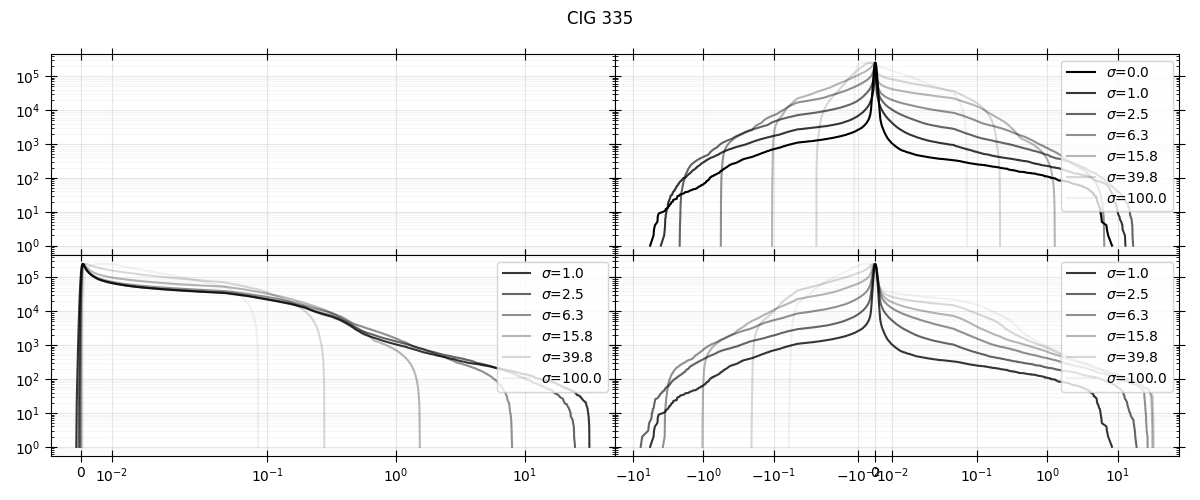

In [15]:
def show_data(x, ax, sigma, alpha):
    sorted_x = np.sort(x.ravel())
    sorted_x = sorted_x[np.isfinite(sorted_x)]
    N = sorted_x.size
    y = np.arange(N)
    y = (y+1)*(N-y)/N
    ax.plot(sorted_x, y, 'k-', alpha=alpha, label=f'$\sigma$={sigma:.1f}')

fig_name = 'change_histograms'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(12, 5))
axes = fig.subplots(nrows=2, ncols=2, squeeze=False,
                    sharex='col', sharey='row',
                    gridspec_kw={'hspace': 0, 'wspace': 0}
                   )
fig.set_tight_layout(True)
fig.suptitle(object_name)
for ax in axes.flat:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)
    ax.tick_params(which='major', direction='inout', length=8, grid_alpha=.3)
    ax.tick_params(which='minor', direction='in', length=2, grid_alpha=.1)
    ax.grid(True, which='both')

    
ax = axes[0, 1]
ax.set_yscale('log')
show_data(data-smooth_data[0], ax, 0, 1)
for i, radius in enumerate(kernel_sizes[:-1]):
    show_data(smooth_data[i]-smooth_data[i+1], ax, radius, ((n_smooth-i)/(n_smooth+1))**1.5)
show_data(smooth_data[-1]-np.nanmean(data), ax, kernel_sizes[-1], (1/(n_smooth+1))**1.5)
ax.legend()


ax = axes[1, 0]
ax.set_yscale('log')
for i, radius in enumerate(kernel_sizes):
    show_data(smooth_data[i], ax, radius, ((n_smooth-i)/(n_smooth+1))**1.5)
ax.legend(loc='upper right')

ax = axes[1, 1]
ax.set_yscale('log')
for i, radius in enumerate(kernel_sizes):
    show_data(data-smooth_data[i], ax, radius, ((n_smooth-i)/(n_smooth+1))**1.5)
ax.legend()

ax = axes[-1, 0]
ax.set_xscale('log')
ax.set_xscale('symlog', linthresh=np.std(data-smooth_data[0]))

ax = axes[-1, 1]
ax.set_xscale('symlog', linthresh=np.std(data-smooth_data[0]))


## 4. Hierarchical Overdensity Tree (HOT)

In [ ]:
importlib.reload(scripts.HOT)
sorted_strides = np.hstack([np.sort(data.strides)//data.itemsize, data.size]) # DIRTY HACK when testig particles at the boundary
t0 = time()
label, catalog = scripts.HOT.run(data, argsorted_data, sorted_strides)
print(f'     {time()-t0:.3g} seconds')

In [ ]:
parent = catalog[0]
area = catalog[1]
test_stat = catalog[2]
#max_test_stat = catalog[3]

## 5. Reliability

In [ ]:
importlib.reload(scripts.reliability)
reliability = scripts.reliability.run(test_stat, area, plots=True)

In [ ]:
true_overdensity = reliability > 0
n_sources = np.count_nonzero(true_overdensity)
print(f'{n_sources} potential sources found')

## 6. Clean-up

In [ ]:
importlib.reload(scripts.cleanup)
label, old_label = scripts.cleanup.run(label, parent, area, true_overdensity, plots=True)

## 7. Compute weights

In [ ]:
def old_compute_weight(object_label, label_map, secondary_map):
    weight = np.zeros_like(data)

    #target = np.where(((label_map == object_label) | (secondary_map == object_label)) & (np.isfinite(data)))
    target = np.where((label_map == object_label) & (np.isfinite(data)))
    n_target = target[0].size
    if n_target <= 3:
        print(f'> WARNING: object {object_label} is empty')
        return weight

    weight[target] = data[target]
    background = np.min(data[target])
    secondary = np.where((secondary_map == object_label) & (np.isfinite(data)))
    if secondary[0].size > 0:
        background = min(background, np.min(data[secondary]))
    weight[target] -= background
    norm = np.nansum(weight)
    #print(f'object {object_label}: {n_target} pixels, flux={norm:.3g} ({100*norm/background/n_target:.3g}% of background={background:.3g})')

    weight = np.fft.rfftn(weight)
    weight = np.fft.irfftn(weight*np.absolute(weight)/norm)
    weight[weight < -np.min(weight)] = 0
    weight /= np.nansum(weight)
    weight *= norm+background*n_target

    return weight

In [ ]:
def compute_weight(object_label, label_map, secondary_map, verbose=False):

    primary = np.where((label_map == object_label) & (np.isfinite(data)))
    n_primary = primary[0].size
    if n_primary <= 1:
        print(f'> WARNING: object {object_label} has {n_primary} elements')
        return None

    weight = np.zeros_like(data)
    weight[primary] = data[primary]
    
    kernel = np.copy(weight)
    #kernel[primary] -= np.min(kernel[primary])
    #kernel[primary] -= np.sqrt(np.mean(kernel[primary]**2)).clip(min=0)
    #norm = np.sum(kernel)
    #kernel = (kernel/norm)**2
    norm = np.sum(kernel)
    #return kernel/norm
    weight = np.fft.rfftn(weight)
    kernel = np.fft.rfftn(kernel/norm)
    weight = np.fft.irfftn(weight*np.absolute(kernel))
    weight *= np.max(data[primary])/np.max(weight)
    #weight = np.fmin(np.abs(data), weight).clip(min=0)
    weight = 1/(1/np.abs(data) + 1/np.abs(weight))
    #weight -= np.min(weight)
    #print(np.sum(data[primary]), np.sum(weight))
    #weight *= np.nansum(data[primary])/np.nansum(weight[primary])
    
    if verbose:
        print(f'> INFO: object {object_label}, norm={norm/n_primary}')
    return weight
    #return np.where(weight < data, weight, data)

In [ ]:
t0 = time()
total_weight = np.zeros_like(data)
#new_label = np.zeros_like(label)
#max_weight = np.zeros_like(data)
primary_label = np.zeros_like(label)
secondary_label = np.zeros_like(label)
max_weight = np.zeros_like(data)
second_weight = np.zeros_like(data)
for lbl in np.unique(label):
    if lbl % 50 == 0:
        print(f'Object {lbl}')
    weight = compute_weight(lbl, label, label)
    if weight is not None:
        total_weight += weight

        #update = np.where(weight > max_weight)
        #new_label[update] = lbl
        #max_weight[update] = weight[update]
        update = np.where(weight >= second_weight)
        secondary_label[update] = lbl
        second_weight[update] = weight[update]

        update = np.where(weight >= max_weight)
        secondary_label[update] = primary_label[update]
        primary_label[update] = lbl
        second_weight[update] = max_weight[update]
        max_weight[update] = weight[update]

print(f"{time()-t0:.3g} seconds")

In [ ]:
t0 = time()
new_total_weight = np.zeros_like(data)
'''
'''
new_primary_label = np.zeros_like(label)
new_secondary_label = np.zeros_like(label)
max_weight = np.zeros_like(data)
second_weight = np.zeros_like(data)
for lbl in np.unique(primary_label):
    if lbl % 50 == 0:
        print(lbl)
    weight = compute_weight(lbl, primary_label, secondary_label)
    if weight is not None:
        new_total_weight += weight

        update = np.where(weight >= second_weight)
        new_secondary_label[update] = lbl
        second_weight[update] = weight[update]

        update = np.where(weight >= max_weight)
        new_secondary_label[update] = new_primary_label[update]
        new_primary_label[update] = lbl
        second_weight[update] = max_weight[update]
        max_weight[update] = weight[update]
'''
primary_label = new_primary_label
secondary_label = new_secondary_label
'''

#iteration += 1
#total_weight = new_total_weight
#primary_label = new_primary_label
#secondary_label = new_secondary_label
#print(f"iteration {iteration}: {time()-t0:.3g} seconds")
updated_background = np.nanmean(data)-np.nanmean(new_total_weight)
#new_total_weight += updated_background
print(f"Background level: {updated_background:.3g} ({100*updated_background/np.nanmean(data):.3g}% of the flux) {time()-t0:.3g} seconds")

## 8. Explore results

### Definitions

In [ ]:
plots = True
data_dimensionality = sorted_strides.size-1
#p0, p16, p50, p100 = np.nanpercentile(data, [0, 16, 50, 100])
#colour_scale = colors.SymLogNorm(vmin=p50-3*(p50-p16), linthresh= p50+3*(p50-p16), vmax=p100)
#data_min = data.ravel()[argsorted_data[0]]
#pivot = np.percentile(data[data > 0], 1)
#scale_min = data.ravel()[argsorted_data[int(argsorted_data.size*.01)]]
#pivot = data.ravel()[argsorted_data[int(argsorted_data.size*.5)]]  # median
#scale_max = data.ravel()[argsorted_data[int(argsorted_data.size*.99)]]
#scale_max = data.ravel()[argsorted_data[-1]]
#colour_scale = colors.SymLogNorm(vmin=scale_min, linthresh=2*pivot-scale_min, vmax=scale_max)
p0, p16, p50, p100 = np.nanpercentile(data, [0, 16, 50, 100])
colour_scale = colors.SymLogNorm(vmin=p16, linthresh=2*p50-p16, vmax=p100+p16)

colour_scale = colors.LogNorm(vmin=p16, vmax=p100)

In [ ]:
my_cmap = np.vstack([(np.argsort(np.random.random(n_sources))+1)/n_sources, (np.argsort(np.random.random(n_sources))+1)/n_sources, (np.argsort(np.random.random(n_sources))+1)/n_sources, np.ones(n_sources)]).T
my_cmap[0, :] = [0., 0., 0., 1.]
final_cmap = colors.ListedColormap(my_cmap)

### Individual objects

In [ ]:
study_object = 68

In [ ]:
def profile(object_label, label_map):

    primary = np.where((label_map == object_label) & (np.isfinite(data)))
    n_primary = primary[0].size
    if n_primary <= 1:
        print(f'> WARNING: object {object_label} has {n_primary} elements')
        return None

    weight = np.zeros_like(data)
    weight[primary] = data[primary]
    
    kernel = np.copy(weight)
    #kernel[primary] -= np.min(kernel[primary])
    #kernel[primary] -= np.sqrt(np.mean(kernel[primary]**2)).clip(min=0)
    #norm = np.sum(kernel)
    #kernel = (kernel/norm)**2
    norm = np.sum(kernel)

    weight = np.fft.rfftn(weight)
    kernel = np.fft.rfftn(kernel/norm)
    weight = np.fft.irfftn(weight*np.absolute(kernel)).clip(min=0)
    
    sorted_by_weight = np.argsort(weight.flat)[:-n_primary-1:-1]
    weight += np.nan
    weight[primary] = data[primary]
    profile = weight.flat[sorted_by_weight[:n_primary]]
    #profile = data.flat[sorted_by_weight[:n_primary]]
    #delta = np.nancumsum(profile)/np.cumsum(~np.isnan(p))
    return profile


p = profile(study_object, label)
n = 1+np.arange(p.size)
good = np.where(~np.isnan(p))
p = np.interp(n, n[good], p[good])
m = np.cumsum(p)
#n = np.cumsum(~np.isnan(p))
delta_left = m/n
delta_right = np.nancumsum(p[::-1])[::-1]/np.cumsum(~np.isnan(p[::-1]))[::-1]
background = np.nanmedian(delta_right)
sigma = np.sqrt(np.mean((p[p < background]-background)**2))

corrected = np.fmin(p, delta_left)
corrected = np.nanmedian(np.vstack([corrected[:-2], corrected[1:-1], corrected[2:]]), axis=0)
corrected = np.hstack([corrected[0], corrected, corrected[-1]])
signal = np.nancumsum(p) - background*n
corrected_signal = np.nancumsum(corrected) - background*n
signal_to_noise = signal / (sigma*np.sqrt(n))
corrected_signal_to_noise = (corrected_signal / (sigma*np.sqrt(n))).clip(min=0)

fig_name = 'profile'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(5, 7))
axes = fig.subplots(nrows=3, ncols=1, squeeze=False,
                    sharex='col', sharey='row',
                    gridspec_kw={'hspace': 0, 'wspace': 0})

ax = axes[0, 0]
ax.plot(n, p, 'k-')
#ax.plot(n, delta_left, 'b-')
ax.plot(n, delta_right, 'r-')
ax.plot(n, corrected, 'b-', alpha=.5)

#ax.plot(n[p < delta_right], p[p < delta_right], 'r.')
#ax.plot(n[p > delta_left], p[p > delta_left], 'b.')
ax.axhline(background+sigma, c='r', ls=':')
ax.axhline(background, c='r', ls='--')
ax.axhline(background-sigma, c='r', ls=':')
print(np.nansum(p[p > delta_left])/np.nansum(p[p < delta_right]), np.max(corrected_signal_to_noise), np.nanmean(p))

ax = axes[1, 0]
ax.plot(n, corrected_signal, 'b-')
ax.plot(n, signal, 'k-')
ax.plot(n, sigma*np.sqrt(n), 'r:')

ax = axes[2, 0]
ax.plot(n, signal_to_noise, 'k-')
ax.plot(n, corrected_signal_to_noise, 'b-')
ax.plot(n, ((corrected-background)*(1-np.exp(-.5*corrected_signal_to_noise**2))).clip(min=0), 'r-')


In [ ]:
fig_name = 'PSF'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(5, 4))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False,
                    sharex='col', sharey='row',
                    gridspec_kw={'hspace': 0, 'wspace': 0})

def profile(object_label, label_map):

    primary = np.where((label_map == object_label) & (np.isfinite(data)))
    n_primary = primary[0].size
    if n_primary <= 1:
        print(f'> WARNING: object {object_label} has {n_primary} elements')
        return None

    weight = np.zeros_like(data)
    weight[primary] = data[primary]
    
    kernel = np.copy(weight)
    #kernel[primary] -= np.min(kernel[primary])
    #kernel[primary] -= np.sqrt(np.mean(kernel[primary]**2)).clip(min=0)
    #norm = np.sum(kernel)
    #kernel = (kernel/norm)**2
    norm = np.sum(kernel)

    weight = np.fft.rfftn(weight)
    kernel = np.fft.rfftn(kernel/norm)
    weight = np.fft.irfftn(weight*np.absolute(kernel)).clip(min=0)
    
    sorted_by_weight = np.argsort(weight.flat)[:-n_primary-1:-1]
    weight += np.nan
    weight[primary] = data[primary]
    profile = weight.flat[sorted_by_weight[:n_primary]]
    #delta = np.nancumsum(profile)/np.cumsum(~np.isnan(p))
    return profile


for obj in np.unique(label)[1:]:
    print(obj)
    p = profile(obj, label)
    n = 1+np.arange(p.size)
    good = np.where(~np.isnan(p))
    p = np.interp(n, n[good], p[good])
    m = np.cumsum(p)
    #n = np.cumsum(~np.isnan(p))
    delta_left = m/n
    delta_right = np.nancumsum(p[::-1])[::-1]/np.cumsum(~np.isnan(p[::-1]))[::-1]
    background = np.nanmedian(delta_right)
    sigma = np.sqrt(np.mean((p[p < background]-background)**2))

    corrected = np.fmin(p, delta_left)
    corrected = np.nanmedian(np.vstack([corrected[:-2], corrected[1:-1], corrected[2:]]), axis=0)
    corrected = np.hstack([corrected[0], corrected, corrected[-1]])
    corrected_signal = np.nancumsum(corrected) - background*n
    corrected_signal_to_noise = (corrected_signal / (sigma*np.sqrt(n))).clip(min=0)

    ax = axes[0, 0]
    ax.plot(n, ((corrected-background)*(1-np.exp(-.5*corrected_signal_to_noise**2))).clip(min=0), 'k-', alpha=.01)


In [ ]:
n.size, p.size, corrected.size

In [ ]:
def show_data(data, fig, ax, cmap):
    p0, p1, p50, p99, p100 = np.nanpercentile(data, [0, 1, 50, 99.9, 100])
    rms = np.sqrt(np.nanmean(data**2))
    if p50 > 0:
        colour_scale = colors.SymLogNorm(vmin=p1, linthresh=p50, vmax=p100)
    else:
        colour_scale = colors.Normalize(vmin=p0, vmax=p100)
    im = ax.imshow(
        data,
        interpolation='nearest', origin='lower',
        cmap=cmap,
        norm = colour_scale,
        )
    cb = fig.colorbar(im, ax=ax)

    
def explore_weight(object_label, data, labels, total_weight, intensity_scale):
    fig_name = 'explore_weight'
    plt.close(fig_name)
    fig = plt.figure(fig_name, figsize=(12, 5))
    axes = fig.subplots(nrows=2, ncols=5, squeeze=False,
                        sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0})

    old_weight = compute_weight(object_label, label, label, verbose=True)
    new_weight = compute_weight(object_label, primary_label, secondary_label)
    if old_weight is None:
        old_weight = np.zeros_like(data)
    if new_weight is None:
        new_weight = np.zeros_like(data)

    ax = axes[0, 0]
    ax.set_title(f'{object_name}')
    show_data(data, fig, ax, 'terrain')
    ax.contour(primary_label, levels=[.5], colors='w', linewidths=.5)
    ax.contour(new_primary_label, levels=[.5], colors='k', linewidths=1)

    ax = axes[0, 1]
    ax.set_title(f'object {object_label} old weight')
    show_data(old_weight, fig, ax, 'terrain')

    ax = axes[0, 2]
    ax.set_title(f'old total weight')
    show_data(total_weight, fig, ax, 'terrain')

    ax = axes[0, 3]
    ax.set_title(f'primary label')
    im = ax.imshow(
        primary_label,
        interpolation='nearest', origin='lower',
        vmin=-.5, vmax=n_sources-.5, cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[0, 4]
    ax.set_title(f'new primary label')
    im = ax.imshow(
        new_primary_label,
        interpolation='nearest', origin='lower',
        vmin=-.5, vmax=n_sources-.5, cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[1, 0]
    ax.set_title(f'HOT labels')
    im = ax.imshow(
        label,
        interpolation='nearest', origin='lower',
        vmin=-.5, vmax=n_sources-.5, cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[1, 1]
    ax.set_title(f'new weight')
    show_data(new_weight, fig, ax, 'terrain')

    ax = axes[1, 2]
    ax.set_title(f'new total weight')
    show_data(new_total_weight, fig, ax, 'terrain')

    ax = axes[1, 3]
    ax.set_title(f'secondary label')
    im = ax.imshow(
        secondary_label,
        interpolation='nearest', origin='lower',
        vmin=-.5, vmax=n_sources-.5, cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[1, 4]
    ax.set_title(f'new secondary label')
    im = ax.imshow(
        new_secondary_label,
        interpolation='nearest', origin='lower',
        vmin=-.5, vmax=n_sources-.5, cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)


    
explore_weight(study_object, data, label, total_weight, colour_scale)

In [ ]:
np.where(label==study_object)

In [ ]:
np.unique(primary_label).size, np.unique(new_primary_label).size

In [ ]:
z_Chernoff_max = 1 + np.logspace(-3, 3, 101)
n_Chernoff_max = 1 - 2*np.log(1/test_stat.size)/(z_Chernoff_max-1-np.log(z_Chernoff_max))

fig_name = 'new_reliability'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(5, 5))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False,
                    sharex=True, sharey=True,
                    gridspec_kw={'hspace': 0, 'wspace': 0})

ax = axes[0, 0]
t0 = test_stat[true_overdensity] / 10**np.interp(area[true_overdensity], n_Chernoff_max[::-1], np.log10(z_Chernoff_max)[::-1])
ax.plot(area[true_overdensity], t0, 'k+', alpha=.25)
ax.axhline(np.min(t0), c='k', ls='--')
sorted_by_t0 = np.argsort(t0)

for lbl in np.unique(label):
    l = old_label[lbl]
    t = test_stat[l] / 10**np.interp(area[l], n_Chernoff_max[::-1], np.log10(z_Chernoff_max)[::-1])
    if t > 0:
        ax.text(area[l], t, f'{lbl}', alpha=.5)

#ax.plot(n_Chernoff_max, z_Chernoff_max, 'b--')

final = []
for lbl in np.unique(primary_label):
    primary = np.where(primary_label == lbl)
    n_primary = primary[0].size
    t = np.nanvar(data[primary])
    ax.plot(n_primary, t, 'r,')
    t /= 10**np.interp(n_primary, n_Chernoff_max[::-1], np.log10(z_Chernoff_max)[::-1])
    if t > t0[sorted_by_t0][0]:
        r = np.interp(t, t0[sorted_by_t0], reliability[true_overdensity][sorted_by_t0])
        print('>', lbl, t, r, old_label[lbl], area[old_label[lbl]], reliability[old_label[lbl]])
        final.append(lbl)
        ax.plot([area[old_label[lbl]], n_primary],
                [test_stat[old_label[lbl]]/10**np.interp(area[old_label[lbl]], n_Chernoff_max[::-1], np.log10(z_Chernoff_max)[::-1]), t],
               'k-', alpha=.025)
        sc = ax.scatter(n_primary, t, marker='o', s=10, c=r, cmap='nipy_spectral_r', vmin=0, vmax=1)
    else:
        ax.plot(n_primary, t, 'kx')
        print(' ', lbl, t)
cb = fig.colorbar(sc, ax=ax)

ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
len(final)

In [ ]:
    '''
    ax.set_title(f'old lables')
    im = ax.imshow(
        label,
        interpolation='nearest', origin='lower',
        cmap=final_cmap,
        )
    ax.set_title(f'max weight')
    im = ax.imshow(
        max_weight,
        interpolation='nearest', origin='lower',
        cmap='terrain',
        norm = intensity_scale,
        )
    ax.set_title(f'new weight')
    im = ax.imshow(
        new_weight,
        interpolation='nearest', origin='lower',
        cmap='terrain',
        norm = intensity_scale,
        )
    ax.set_title(f'updated fraction')
    im = ax.imshow(
        new_weight/new_total_weight,
        interpolation='nearest', origin='lower',
        cmap='rainbow',
        #norm=colors.LogNorm(vmin=1e-3, vmax=1),
        vmin=0, vmax=1,
        )
    ax.set_title(f'fraction')
    im = ax.imshow(
        weight/total_weight,
        interpolation='nearest', origin='lower',
        cmap='rainbow',
        vmin=0, vmax=1,
        )
    im = ax.imshow(
        total_model,
        interpolation='nearest', origin='lower',
        cmap='terrain',
        norm = intensity_scale,
        )
    '''

In [ ]:
def intensity_map(data):
    return np.nanstd(data, axis=2)

def explore_object_3D(object_label, data, labels, intensity_scale):
    target = np.where(label == object_label)
    target_min = np.nanmin(data[target])
    n_target = target[0].size
    index_min = np.min(target, axis=1).astype(int)
    L = np.minimum(data.shape, 2*(np.max(target, axis=1).astype(int) - index_min))
    print(f'> DEBUG: {index_min}-{index_min+L} / {np.max(target, axis=1).astype(int)}: {L} ({data.shape})')
    index_min = np.clip(index_min-L//4, a_min=0, a_max=data.shape-L)
    print(f'> DEBUG: {index_min}-{index_min+L}')

    intensity = np.zeros(L)
    shifted_target = np.ravel_multi_index(target-index_min[:, np.newaxis], intensity.shape)
    intensity.flat[shifted_target] = data[target]
    decreasing_intensity = np.argsort(intensity.flat[shifted_target])[::-1]

    transform = np.fft.rfftn(intensity)
    convolution = np.fft.irfftn(transform*np.absolute(transform))
    decreasing_model = np.argsort(convolution.flat)[::-1]
    convolution *= np.sum(intensity) / np.sum(convolution.flat[decreasing_model[:n_target]])

    model = convolution.copy()
    #model.flat[decreasing_model[:n_target]] = intensity.flat[shifted_target][decreasing_intensity]
    #model.flat[decreasing_model[:n_target]] = np.maximum(model.flat[decreasing_model[:n_target]], intensity.flat[shifted_target][decreasing_intensity])
    convolution_weight = np.arange(n_target)/n_target
    model.flat[decreasing_model[:n_target]] = (
        convolution_weight * model.flat[decreasing_model[:n_target]] + (1-convolution_weight) * intensity.flat[shifted_target][decreasing_intensity])
    

    fig_name = 'explore_object'
    plt.close(fig_name)
    fig = plt.figure(fig_name, figsize=(12, 3))    
    axes = fig.subplots(nrows=1, ncols=3, squeeze=False,
                        sharex=True, sharey=True,
                        #gridspec_kw={'hspace': 0, 'wspace': 0}
                       )

    ax = axes[0, 0]
    ax.set_title(f'{object_name} - object {object_label}')
    im = ax.imshow(
        intensity_map(intensity),
        interpolation='nearest', origin='lower',
        #cmap='ocean',
        #cmap='nipy_spectral',
        cmap='terrain',
        norm = intensity_scale,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[0, 1]
    ax.set_title('Self-convolution')
    im = ax.imshow(
        intensity_map(convolution),
        interpolation='nearest', origin='lower',
        cmap='terrain',
        norm = intensity_scale,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[0, 2]
    ax.set_title('Source model')
    im = ax.imshow(
        intensity_map(model),
        interpolation='nearest', origin='lower',
        cmap='terrain',
        norm = intensity_scale,
        )
    cb = fig.colorbar(im, ax=ax)

    for ax in axes.flatten():
        ax.tick_params(which='both', direction='in')
        ax.grid(alpha=.5)
    fig.set_tight_layout(True)
    plt.show()

    
    fig_name = 'object_intensity_profile'
    plt.close(fig_name)
    fig = plt.figure(fig_name, figsize=(6, 3))
    axes = fig.subplots(nrows=1, ncols=1, squeeze=False,
                        sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0})

    ax = axes[0, 0]
    ax.plot(intensity.flat[shifted_target][decreasing_intensity], 'k-')
    ax.plot(convolution.ravel()[decreasing_model], 'b:')
    ax.set_ylabel('Intensity')
    ax.set_yscale('log')
    ax.set_xlabel('pixel')
    ax.set_xscale('log')

    for ax in axes.flatten():
        ax.tick_params(which='both', direction='in')
        ax.grid(alpha=.5)
    fig.set_tight_layout(True)
    plt.show()


if data_dimensionality == 3:
    explore_object_3D(study_object, data, label, colors.LogNorm())

### Segmentation

In [ ]:
def show_segmentation(intensity, labels, intensity_scale):
    fig_name = 'segmentation'
    plt.close(fig_name)
    fig = plt.figure(fig_name, figsize=(12, 4))
    
    axes = fig.subplots(nrows=1, ncols=3, squeeze=False,
                        sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0})

    ax = axes[0, 0]
    ax.set_title(object_name)
    im = ax.imshow(
        intensity,
        interpolation='nearest', origin='lower',
        #cmap='ocean',
        #cmap='nipy_spectral',
        cmap='terrain',
        norm = intensity_scale,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[0, 1]
    ax.set_title(object_name)
    '''
    im = ax.imshow(
        total_weight,
        interpolation='nearest', origin='lower',
        #cmap='ocean',
        #cmap='nipy_spectral',
        cmap='terrain',
        norm = intensity_scale,
        )
    cb = fig.colorbar(im, ax=ax)
    '''

    ax = axes[0, 2]
    '''
    ax.set_title(f'segmentation ({n_sources} objects)')
    im = ax.imshow(
        new_label,
        interpolation='nearest', origin='lower',
        cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)
    '''

    ax = axes[0, 1]
    ax.set_title(f'segmentation ({n_sources} objects)')
    im = ax.imshow(
        #labels == study_object,
        labels,
        interpolation='nearest', origin='lower',
        cmap=final_cmap,
        )
    cb = fig.colorbar(im, ax=ax)

    ax = axes[0, 2]
    ax.set_title(f'Reliability')
    im = ax.imshow(
        reliability[old_label[labels]],
        interpolation='nearest', origin='lower',
        cmap='nipy_spectral_r',
        )
    cb = fig.colorbar(im, ax=ax)
    '''
    '''

    for ax in axes.flatten():
        ax.tick_params(which='both', direction='in')
        ax.grid(alpha=.5)
    fig.set_tight_layout(True)
    plt.show()

In [ ]:
if plots and data_dimensionality == 2:
    show_segmentation(data, label, colour_scale)

elif plots and data_dimensionality == 3:
    #intensity = np.nanmean(data**2, axis=1)
    intensity = np.nanmax(data, axis=1)
    #p16, p50 = np.nanpercentile(intensity, [16, 50])
    #intensity = (intensity-p50)/(p50-p16)
    #intensity_scale = colors.SymLogNorm(vmin=0, linthresh=.1, vmax=10)
    intensity_scale = colors.Normalize(vmin=0, vmax=1)
    show_segmentation(intensity, np.nanmax(label, axis=1), intensity_scale)


In [ ]:
'''
'''
if plots and data_dimensionality == 3:

    mode = 0
    
    #boundary = np.zeros_like(max_map)
    #boundary[:, :-1][max_map[:, :-1] != max_map[:, 1:]] = 1
    #boundary[:-1, :][max_map[:-1, :] != max_map[1:, :]] = 1
    plt.close('filtered')
    fig = plt.figure('filtered', figsize=(8, 8))
    ax = fig.subplots(nrows=2, ncols=2, squeeze=False,
                      sharex=True, sharey=True,
                      gridspec_kw={'bottom': .01, 'left': .1, 'top': .99, 'right': .92,
                                   'hspace': .01, 'wspace': .1},
                      subplot_kw={'projection': wcs},
                     )
    for axis in ax.flatten():
        axis.tick_params(which='both', direction='in')
        axis.grid(alpha=.5)
    #fig.set_tight_layout(True)

    ax[0, 0].set_title('Input data (max)')
    im = ax[0, 0].imshow(
        np.nanmax(data, axis=0),
        interpolation='nearest', origin='lower', cmap='terrain',
        norm = colour_scale
    )
    #ax[0, 0].contour(boundary, levels=[.5], colors='k', linewidths=0.1)
    #ax[1, 0].contour(boundary, levels=[.5], colors='k', linewidths=0.1)
    #ax[1, 1].contour(boundary, levels=[.5], colors='k', linewidths=0.1)
    #ax[0, 0].contour(max_map, levels=np.arange(n_sources)+.5, colors='k', linewidths=0.1)
    #ax[1, 0].contour(max_map, levels=np.arange(n_sources)+.5, colors='k', linewidths=0.1)
    #ax[1, 1].contour(max_map, levels=np.arange(n_sources)+.5, colors='w', linewidths=0.1)
    cb = fig.colorbar(im, ax=ax[0, 0])
    cb.ax.axhline(0, c='k', ls=':')
    #cb.ax.axhline(data.threshold-mode, c='k', ls='--')
    
    ax[0, 1].set_title('Input data (rms)')
    im = ax[0, 1].imshow(
        #(np.sqrt(np.nanmean((data-mode)**2, axis=0)) + np.nanmax(data, axis=0))/2,
        np.nansum(data, axis=0)/np.sqrt(np.nanmean(data**2, axis=0)),
        vmin=0,
        interpolation='nearest', origin='lower', cmap='terrain',
        #norm = colors.SymLogNorm(vmin=-delta_th, linthresh=3*delta_th, vmax=np.max(data-mode)),
        #vmin=-delta/100, vmax=3*delta/10,
        #norm = colour_scale,
    )
    #ax[0, 1].contour(max_map, levels=[0.5])
    cb = fig.colorbar(im, ax=ax[0, 1])
    cb.ax.axhline(0, c='k', ls=':')
    #cb.ax.axhline(data.threshold-mode, c='k', ls='--')
    
    ax[1, 0].set_title(f'Final selection map (max)\n({n_sources} objects)')
    im = ax[1, 0].imshow(
        max_map,
        interpolation='nearest', origin='lower',
        cmap=final_cmap, vmin=-0.5, vmax=n_sources-0.5,
        )
    cb = fig.colorbar(im, ax=ax[1, 0])

    #ax[1, 1].set_title('<lbl^2> / <lbl>')
    im = ax[1, 1].imshow(
        reliability[old_label[max_map]],
        #np.nansum(final_labels**2, axis=0) / np.nansum(final_labels, axis=0),
        interpolation='nearest', origin='lower',
        cmap='nipy_spectral_r',
        #vmin=n_reliable/(n_sources+1), vmax=reliability_threshold,
        #cmap='rainbow_r',
        #vmin=1, vmax=n_final_labels-1,
        )
    cb = fig.colorbar(im, ax=ax[1, 1])


In [ ]:
if plots and data_dimensionality == 3:
    x_range = np.round(plt.figure('segmentation').get_axes()[0].get_xlim()).astype(int)
    y_range = np.round(plt.figure('segmentation').get_axes()[0].get_ylim()).astype(int)
    section = (data[:, y_range[0]:y_range[1], x_range[0]:x_range[1]]-mode)
    section_lables = label[:, y_range[0]:y_range[1], x_range[0]:x_range[1]]
    norm = (y_range[1] - y_range[0]) * (x_range[1] - x_range[0])
    section_labels = label[:, y_range[0]:y_range[1], x_range[0]:x_range[1]]
    unique_section_labels = np.unique(section_labels)

    vertical_slit = np.max(section_labels, axis=2).T
    horizontal_slit = np.max(section_labels, axis=1).T

    plt.close('spectrum')
    fig = plt.figure('spectrum', figsize=(8, 8))
    ax = fig.subplots(nrows=5, ncols=1, squeeze=False,
                      sharex=True, sharey=False,
                      gridspec_kw={'hspace': 0, 'wspace': 0}
                     )
    for axis in ax.flatten():
        axis.tick_params(which='both', direction='in')
        axis.grid(alpha=.5)
        
    fig.set_tight_layout(True)

    
    ax[0, 0].set_title(f'Mean spectra for x in {x_range}, y in {y_range}\n({unique_section_labels.size} objects)')
    im = ax[0, 0].imshow(
        vertical_slit,
        interpolation='nearest', origin='lower',
        #vmin=0, vmax=n_final_labels-1, cmap='rainbow',
        cmap=final_cmap, vmin=-0.5, vmax=n_sources-0.5,
        )
    ax[0, 0].set_aspect('auto')
    ax[0, 0].set_ylabel(r'$\Delta y$')


    im = ax[1, 0].imshow(np.nanmean(section, axis=2).T,
                         interpolation='nearest', origin='lower', cmap='terrain',
                         #norm=colour_scale,
                        )
    #ax[1, 0].contour(vertical_slit, levels=0)
    ax[1, 0].set_aspect('auto')
    ax[1, 0].set_ylabel(r'$\Delta y$')


    ax[2, 0].plot(np.nanmean(section, axis=(1, 2)), 'k-', lw=3)
    ax[2, 0].set_ylabel('spectrum')
    '''
    '''
    for lbl in unique_section_labels[:10]:  # Dirty fix
        mask = np.zeros_like(section)
        mask[section_labels == lbl] = 1
        if lbl == 0:
            ls = ':'
        else:
            ls = '-'
        ax[2, 0].plot(np.nansum(section*mask, axis=(1, 2))/norm, alpha=.5, ls=ls, label=f'{lbl}')
    mean_error = 1/np.sqrt(section.shape[1]*section.shape[2])
    #ax[2, 0].axhline(delta_th*mean_error*bg_std, c='k', ls=':')
    #ax[2, 0].axhline(-delta_th*mean_error*bg_std, c='k', ls=':')
    ax[2, 0].legend()
    
    
    im = ax[3, 0].imshow(np.nanmean(section, axis=1).T,
        #(np.nanmax(section, axis=1) + np.sqrt(np.nanmean(section**2, axis=1))).T/2,
                         interpolation='nearest', origin='lower', cmap='terrain',
                         #vmin=0,
                         norm=colour_scale,
                        )
    #ax[3, 0].contour(horizontal_slit, levels=0)
    ax[3, 0].set_aspect('auto')
    ax[3, 0].set_ylabel(r'$\Delta x$')

    ax[4, 0].set_ylabel(r'$\Delta x$')
    im = ax[4, 0].imshow(
        horizontal_slit,
        interpolation='nearest', origin='lower',
        #vmin=0, vmax=n_final_labels-1, cmap='rainbow',
        cmap=final_cmap, vmin=-0.5, vmax=n_sources-0.5,
        )
    ax[4, 0].set_aspect('auto')
    ax[4, 0].set_ylabel(r'$\Delta x$')

    ax[-1, 0].set_xlabel('frequency / wavelength channel')


## Save FITS file

In [ ]:
hdu_out = fits.PrimaryHDU(final_labels)
hdu_out.writeto('output/HOT_labels.fits', overwrite=True)
'''
'''


In [ ]:
if data_dimensionality == 3:
    hdu_out = fits.PrimaryHDU(np.sum(final_labels, axis=0) / (np.count_nonzero(final_labels, axis=0) + 1e-30))
    hdu_out.writeto('output/HOT_mask.fits', overwrite=True)
'''
'''
